In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from sklearn.model_selection import train_test_split

from keras.models import load_model

%matplotlib inline

/software/local/lib64/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Load in models
mse_cnn = load_model('color_cnn_mse.h5')
bce_cnn = load_model('color_cnn_bce.h5')

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [3]:
def load_data(path):
    print('Loading in data...\n')
    with h5py.File(path,'r') as hf:
        X = hf['X'][:200]
        Y = hf['Y'][:200]

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

    return X_train, X_test, Y_train, Y_test

In [5]:
X_train, X_test, Y_train, Y_test = load_data('/net/student49/data1/wagenveld/NN_data/colorize_image_data.h5')

Loading in data...



/usr/lib64/python2.7/site-packages/skimage/color/colorconv.py:984: UserWarning: Color data out of range: Z < 0 in 1 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/usr/lib64/python2.7/site-packages/skimage/color/colorconv.py:984: UserWarning: Color data out of range: Z < 0 in 19 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/usr/lib64/python2.7/site-packages/skimage/color/colorconv.py:984: UserWarning: Color data out of range: Z < 0 in 5 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


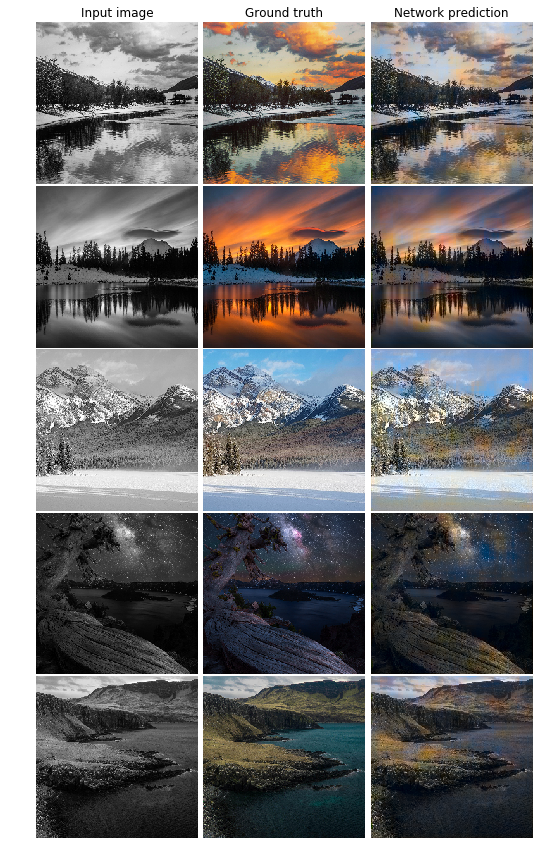

In [6]:
from skimage.color import lab2rgb

#Good images to show: 43,33,0,36,3,28,29,27,41
#images = np.random.randint(0,50, size=5)
images = [0,43,3,27,41]
fig, ax = plt.subplots(5,3, figsize=(9,15), sharex=True, sharey=True)

ax[0,0].set_title('Input image')
ax[0,1].set_title('Ground truth')
ax[0,2].set_title('Network prediction')

for i, im in enumerate(images):
    ground_truth = np.zeros((256,256,3))
    ground_truth[:,:,0] = X_test[im,:,:,0]
    ground_truth[:,:,1:] = Y_test[im]*128
    
    Y_pred = mse_cnn.predict(X_test[im].reshape(1,256,256,1))
    prediction = np.zeros((256,256,3))
    prediction[:,:,0] = X_test[im,:,:,0]
    prediction[:,:,1:] = Y_pred*128
    
    ax[i,0].imshow(X_test[im,:,:,0], cmap='gray')
    ax[i,0].axis('off')
    
    ax[i,1].imshow(lab2rgb(ground_truth))
    ax[i,1].axis('off')
    
    ax[i,2].imshow(lab2rgb(prediction))
    ax[i,2].axis('off')

plt.subplots_adjust(wspace=0,hspace=0.01)
plt.savefig('test_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

/usr/lib64/python2.7/site-packages/skimage/color/colorconv.py:984: UserWarning: Color data out of range: Z < 0 in 2 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)
/usr/lib64/python2.7/site-packages/skimage/color/colorconv.py:984: UserWarning: Color data out of range: Z < 0 in 3 pixels
  warn('Color data out of range: Z < 0 in %s pixels' % invalid[0].size)


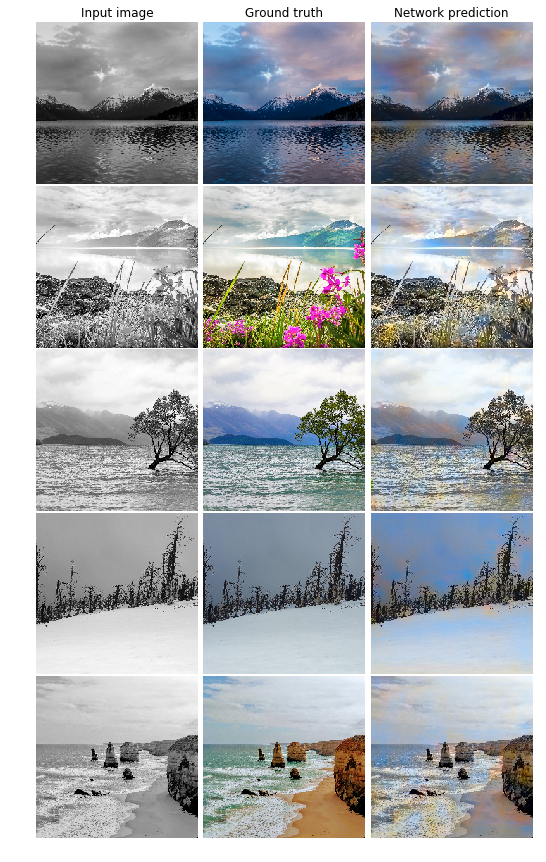

In [8]:
from skimage.color import lab2rgb

#Good images to show: 43,33,0,36,3,28,29,27,41
images = np.random.randint(0,50, size=5)
#images = [0,43,3,27,41]
fig, ax = plt.subplots(5,3, figsize=(9,15), sharex=True, sharey=True)

ax[0,0].set_title('Input image')
ax[0,1].set_title('Ground truth')
ax[0,2].set_title('Network prediction')

for i, im in enumerate(images):
    ground_truth = np.zeros((256,256,3))
    ground_truth[:,:,0] = X_train[im,:,:,0]
    ground_truth[:,:,1:] = Y_train[im]*128
    
    Y_pred = mse_cnn.predict(X_train[im].reshape(1,256,256,1))
    prediction = np.zeros((256,256,3))
    prediction[:,:,0] = X_train[im,:,:,0]
    prediction[:,:,1:] = Y_pred*128
    
    ax[i,0].imshow(X_train[im,:,:,0], cmap='gray')
    ax[i,0].axis('off')
    
    ax[i,1].imshow(lab2rgb(ground_truth))
    ax[i,1].axis('off')
    
    ax[i,2].imshow(lab2rgb(prediction))
    ax[i,2].axis('off')

plt.subplots_adjust(wspace=0,hspace=0.01)
#plt.savefig('test_predictions.png', dpi=300, bbox_inches='tight')
plt.show()

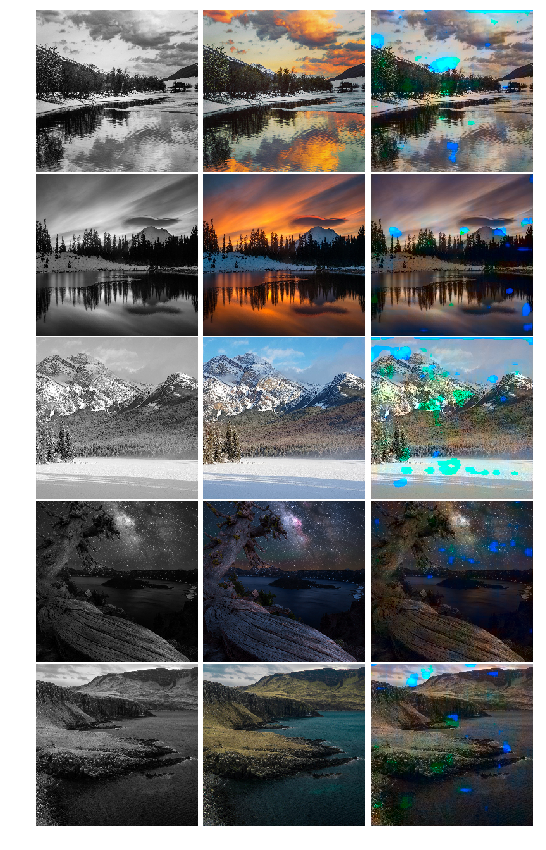

In [9]:
from skimage.color import lab2rgb

#images = np.random.randint(0,50, size=5)
images = [0,43,3,27,41]
fig, ax = plt.subplots(5,3, figsize=(9,15), sharex=True, sharey=True)

for i, im in enumerate(images):
    
    ground_truth = np.zeros((256,256,3))
    ground_truth[:,:,0] = X_test[im,:,:,0]
    ground_truth[:,:,1:] = Y_test[im]*128
    
    Y_pred = bce_cnn.predict(X_test[im].reshape(1,256,256,1))
    prediction = np.zeros((256,256,3))
    prediction[:,:,0] = X_test[im,:,:,0]
    prediction[:,:,1:] = Y_pred*128
    
    ax[i,0].imshow(X_test[im,:,:,0], cmap='gray')
    ax[i,0].axis('off')
    
    ax[i,1].imshow(lab2rgb(ground_truth))
    ax[i,1].axis('off')
    
    ax[i,2].imshow(lab2rgb(prediction))
    ax[i,2].axis('off')

plt.subplots_adjust(wspace=0,hspace=0.01)
plt.savefig('test_predictions_crossentropy.png', dpi=300, bbox_inches='tight')
plt.show()

116
63
87
61
77
129
5
10
69


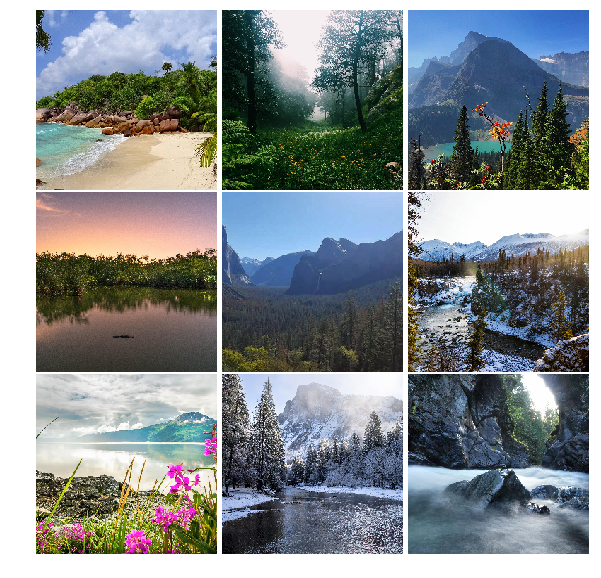

In [106]:
from skimage.color import lab2rgb

images = np.random.randint(0,150, size=9)
fig, ax = plt.subplots(3,3, figsize=(10,10), sharex=True, sharey=True)
axs = ax.ravel()
for i, im in enumerate(images):
    ground_truth = np.zeros((256,256,3))
    ground_truth[:,:,0] = X_train[im,:,:,0]
    ground_truth[:,:,1:] = Y_train[im]*128
    
    axs[i].imshow(lab2rgb(ground_truth))
    axs[i].axis('off')

plt.subplots_adjust(wspace=0,hspace=0.01)
#plt.savefig('training_sample.png', dpi=300, bbox_inches='tight')
plt.show()

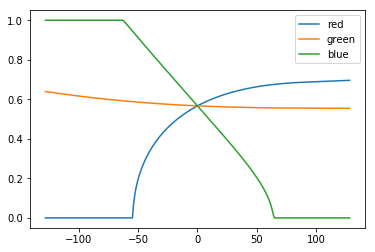

In [101]:
a_color = np.linspace(-128,128,256)
b_color = np.linspace(-128,128,256)

empty_lab_a = np.zeros((256,256,3))
empty_lab_b = np.zeros((256,256,3))

empty_lab_b[0,:,2] = b_color
empty_lab_a[0,:,1] = a_color
empty_lab_b[0,:,0] = 60
empty_lab_a[0,:,0] = 60

a_rgb = lab2rgb(empty_lab_a)
b_rgb = lab2rgb(empty_lab_b)

plt.plot(b_color,b_rgb[0,:,0], label='red')
plt.plot(b_color,b_rgb[0,:,1], label='green')
plt.plot(b_color,b_rgb[0,:,2], label='blue')
plt.legend()
plt.show()

In [102]:
print np.shape(a_rgb.tolist())

(256, 256, 3)


In [103]:
from matplotlib.colors import ListedColormap

a_cmap = ListedColormap(tuple(tuple(row) for row in a_rgb[0,:,:].tolist()), name='a')
b_cmap = ListedColormap(tuple(tuple(row) for row in b_rgb[0,:,:].tolist()), name='b')

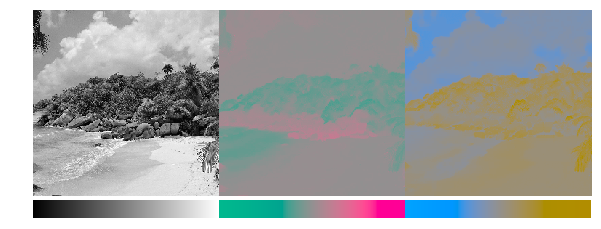

In [124]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,4.5))

image = 116
empty_im_a = np.zeros((256,256,3))
empty_im_b = np.zeros((256,256,3))

empty_lab_b[:,:,2] = Y_train[image,:,:,0]
empty_lab_a[:,:,1] = Y_train[image,:,:,1]

im0 = ax[0].imshow(X_train[image,:,:,0], vmin=0, vmax=100, cmap='gray')
divider0 = make_axes_locatable(ax[0])
cax0 = divider0.append_axes("bottom", size="10%", pad=0.05)
cbar0 = fig.colorbar(im0, ax=ax[0], cax=cax0, orientation='horizontal')
cbar0.set_ticks([])
cbar0.outline.set_visible(False)
ax[0].xaxis.set_visible(False)
ax[0].axis('off')

im1 = ax[1].imshow(Y_train[image,:,:,0], vmin=-1, vmax=1, cmap=a_cmap)
divider1 = make_axes_locatable(ax[1])
cax1 = divider1.append_axes("bottom", size="10%", pad=0.05)
cbar1 = fig.colorbar(im1, ax=ax[1], cax=cax1, orientation='horizontal')
cbar1.set_ticks([])
cbar1.outline.set_visible(False)
ax[1].xaxis.set_visible(False)
ax[1].axis('off')

im2 = ax[2].imshow(Y_train[image,:,:,1], vmin=-1, vmax=1, cmap=b_cmap)
divider2 = make_axes_locatable(ax[2])
cax2 = divider2.append_axes("bottom", size="10%", pad=0.05)
cbar2 = fig.colorbar(im2, ax=ax[2], cax=cax2, orientation='horizontal')
cbar2.set_ticks([])
cbar2.outline.set_visible(False)
ax[2].xaxis.set_visible(False)
ax[2].axis('off')

plt.subplots_adjust(hspace=0, wspace=0)
plt.savefig('lab_image.png', dpi=300, bbox_inches='tight')
plt.show()

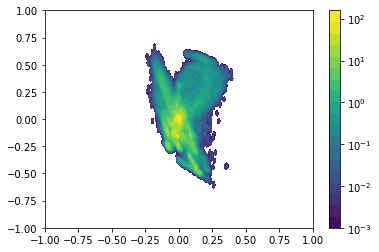

In [40]:
import seaborn as sns
from matplotlib.colors import LogNorm
from matplotlib import cm

levels = np.logspace(-3,2.2,20)
ax = sns.kdeplot(Y_test[:5,:,:,0].flatten(), Y_test[:5,:,:,1].flatten(), shade=True, shade_lowest=True, n_levels=levels, cbar=True, norm=LogNorm(vmin=1e-3, vmax=100), cbar_kws={"ticks":[1e-3,1e-2,0.1,1,10,100]}, cmap=cm.viridis)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_facecolor()
plt.show()